In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('genes normalization/3_countries_combined',index_col=0,sep='\t').T
df2=pd.read_csv('genus normalization/Humangut_all_genus_normalization',index_col=0,sep='\t').T
df3=df2.loc[df1.index.tolist()]
df4=pd.read_excel('genus normalization/Strong_correlation_bimodalgenes&genus.xlsx',index_col=0)
df5=pd.read_csv('corration bimodal & all genus(sort)/3countriescombined_corration_bimodal&genus(genus)',index_col=0,sep='\t')


In [ ]:
#1.find strongest correlation genes&genus&coefificient,and output as a dataframe.
positive_correlation_coefficient=[]
negative_correlation_coefficient=[]
genes_name=[]
positive_genus=[]
negative_genus=[]
for i in range(len(df5)):
    positive_correlation_coefficient0=max(df5.iloc[i])
    positive_correlation_coefficient.append(positive_correlation_coefficient0)

    negative_correlation_coefficient0=min(df5.iloc[i])
    negative_correlation_coefficient.append(negative_correlation_coefficient0)

    positive_genus0=df5.columns.tolist()[df5.iloc[i].tolist().index(positive_correlation_coefficient0)]
    positive_genus.append(positive_genus0)

    negative_genus0=df5.columns.tolist()[df5.iloc[i].tolist().index(negative_correlation_coefficient0)]
    negative_genus.append(negative_genus0)

    genes_name0=df5.index[i]    
    genes_name.append(genes_name0)
# to DataFrame and save.
df = pd.DataFrame({
    'genes_name': genes_name,
    'positive_genus': positive_genus,
    'negative_genus': negative_genus,
    'positive_correlation_coefficient':positive_correlation_coefficient,
    'negative_correlation_coefficient':negative_correlation_coefficient
})  
df.to_csv('Strong_correlation_genes&genus(scatter)/Strong_correlation_genes&genus(scatter)list',index=0,sep='\t')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

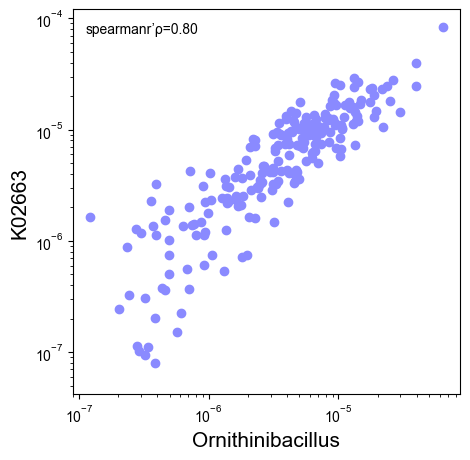

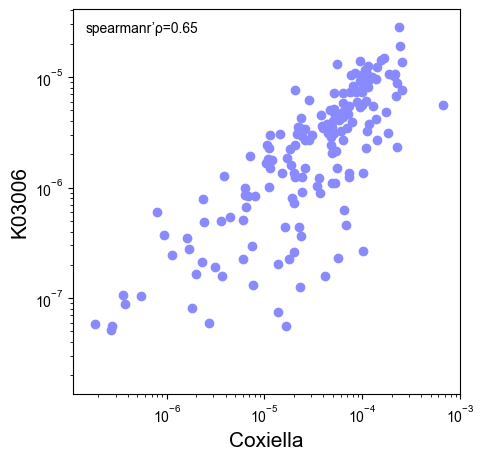

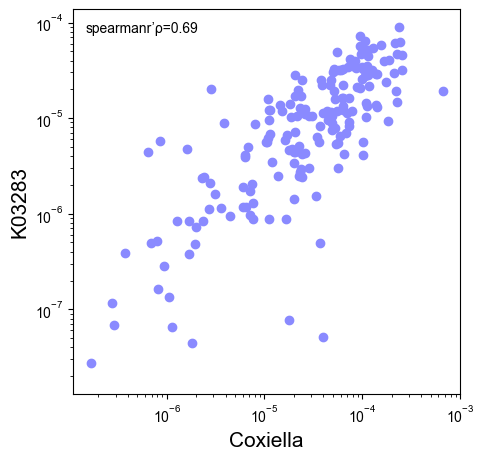

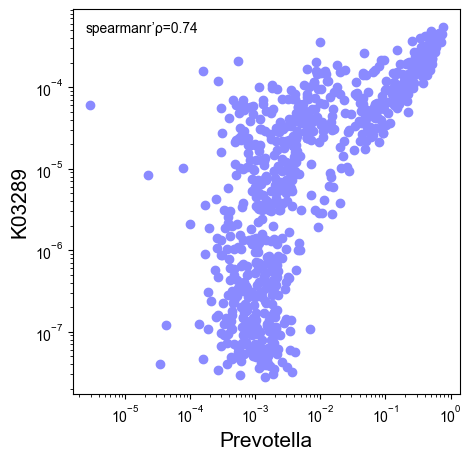

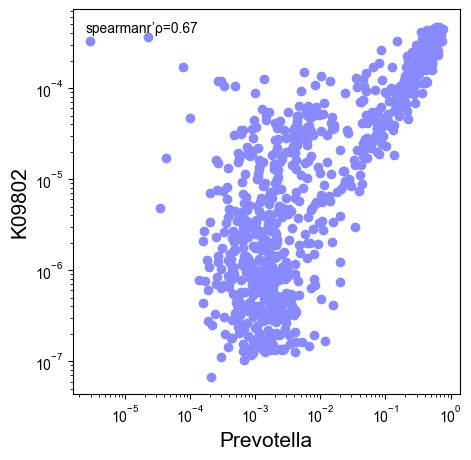

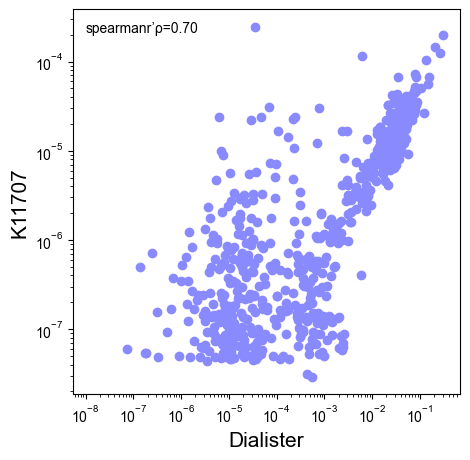

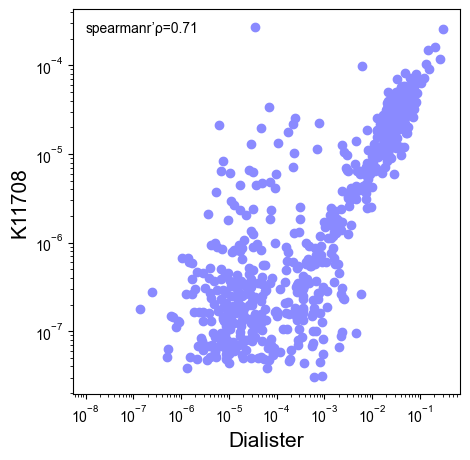

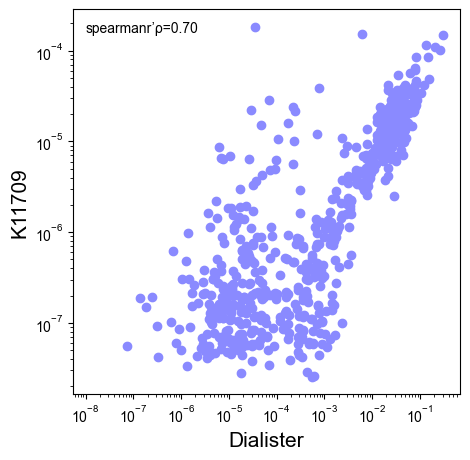

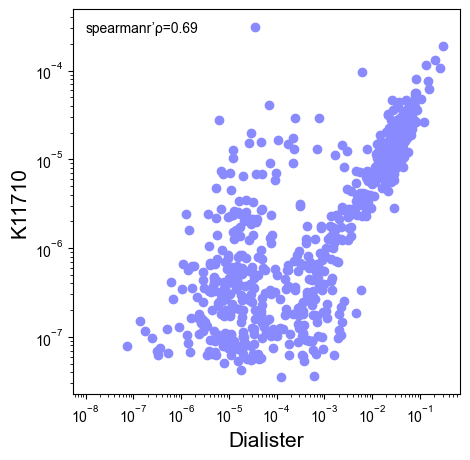

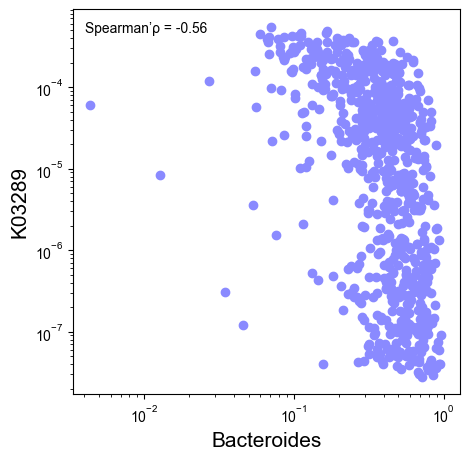

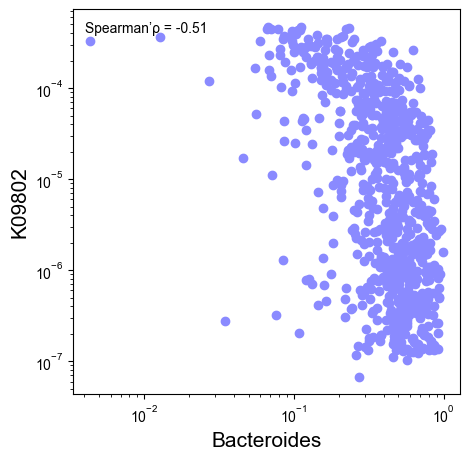

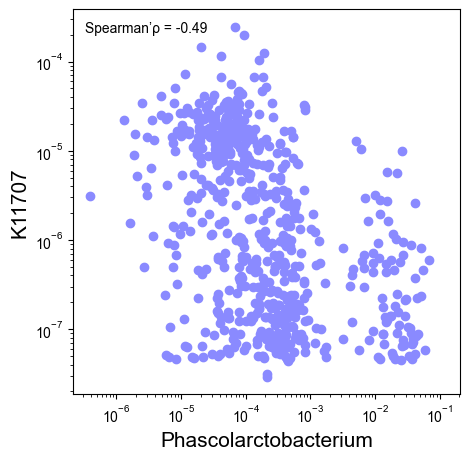

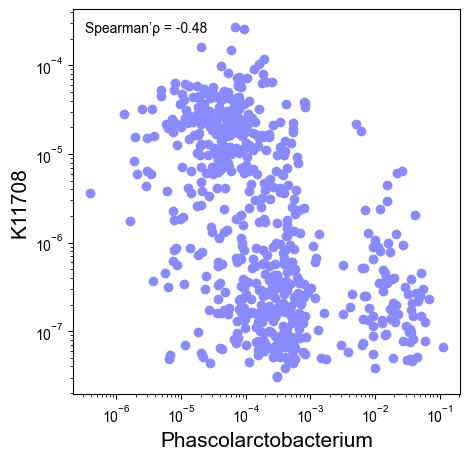

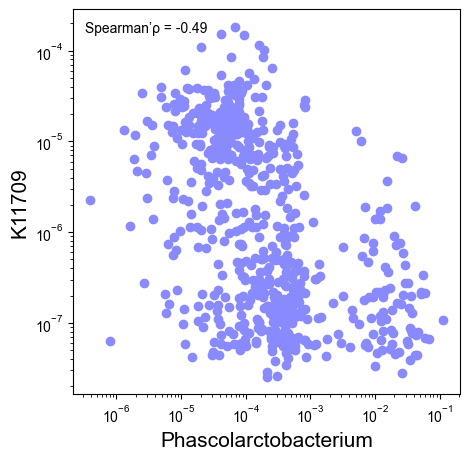

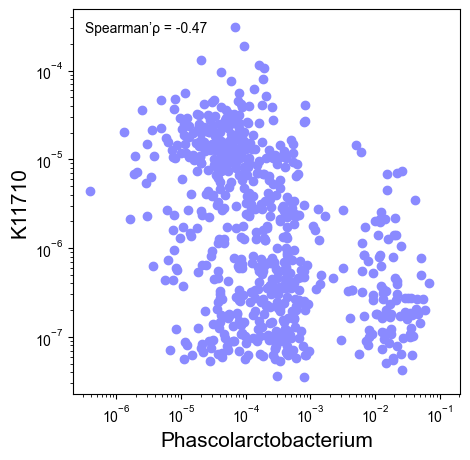

In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
#2.scatter positive correlation genes&genus
#find 'greater than 0.6' positive correlation genes&genus
Strong_positive_genes_set=[(value,genes_name[positive_correlation_coefficient.index(value)])  for index,value  in enumerate(positive_correlation_coefficient) if value>=0.6]
Strong_positive_genus_set=[(value,positive_genus[positive_correlation_coefficient.index(value)])  for index,value  in enumerate(positive_correlation_coefficient) if value>=0.6]
for i in range(len(Strong_positive_genes_set)):
    plt.figure(figsize=(5, 5))
    gene_coefficient,gene=Strong_positive_genes_set[i]
    genu_coefficient,genu=Strong_positive_genus_set[i]
    genus_abundance=df3[genu]
    genes_abundance=df1[gene]
    plt.scatter(genus_abundance,genes_abundance,color='#8A8AFF')
    plt.xlabel(genu,fontsize=15,fontname='Arial')
    plt.ylabel(gene,fontsize=15,fontname='Arial')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(family='Arial')
    plt.yticks(family='Arial')
    plt.legend(title=f'spearmanr\u2019\u03C1={gene_coefficient:.2f}',loc='upper left',prop={'family':'Arial'},frameon=False)
    plt.savefig('fig/strong_positive_'+gene+'&'+genu+'.pdf')
#find 'less than -0.4' negative correlation genes&genus
Strong_negative_genes_set=[(value,genes_name[negative_correlation_coefficient.index(value)])  for index,value  in enumerate(negative_correlation_coefficient) if value<=-0.4]
Strong_negative_genus_set=[(value,negative_genus[negative_correlation_coefficient.index(value)])  for index,value  in enumerate(negative_correlation_coefficient) if value<=-0.4]
for i in range(len(Strong_negative_genes_set)):
    plt.figure(figsize=(5, 5))
    gene_coefficient,gene=Strong_negative_genes_set[i]
    genu_coefficient,genu=Strong_negative_genus_set[i]
    genus_abundance=df3[genu]
    genes_abundance=df1[gene]
    plt.scatter(genus_abundance,genes_abundance,color='#8A8AFF')
    plt.xlabel(genu,fontsize=15,fontname='Arial')
    plt.ylabel(gene,fontsize=15,fontname='Arial')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(family='Arial')
    plt.yticks(family='Arial')
    plt.legend(title=f'Spearman\u2019\u03C1 = {gene_coefficient:.2f}',loc='upper left',prop={'family':'Arial'},frameon=False) 
    plt.savefig('fig/strong_negative_'+gene+'&'+genu+'.pdf',format="pdf")